# Отчет по Лабоработной работе №1

При помощи [run.sh](run.sh) провел серию из 10 запусков перемножения матриц для всех размеров от 1000 до 1100.

Отчет о запусках находится в файле [full_log.txt](full_log.txt)

##### Распарсим его!

In [34]:
def parse_log(path='full_log.txt'):
    '''
    Log format:
        Attempt n
        n = 1000
        timeSimple: 2.21306
        timeBlock: 1.61328
        timeSwapped: 0.318205
        ...
    Return:
        * experiments = [{'Simple': [(1000, 2.21306), ...], }, ...]
        * len(experiments) == 10
    '''
    experiments = list()
    current_size = None
    for line in open(path):
        if 'Attempt' in line:
            experiments.append(dict())
        elif 'n = ' in line:
            current_size = int(line.split('=')[1].strip())
        else:
            name, value = map(str.strip, line.split(':'))
            experiments[-1].setdefault(name[4:], list()).append((current_size, float(value)))
    return experiments
experiments = parse_log()

#### И нарисуем!

In [24]:
%matplotlib inline
from matplotlib import pyplot

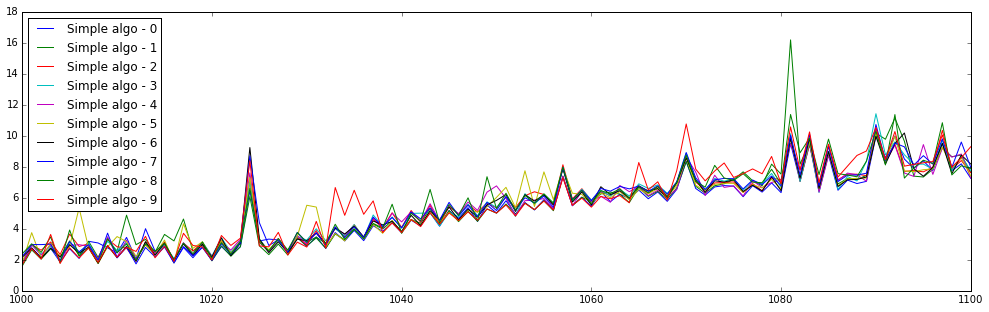

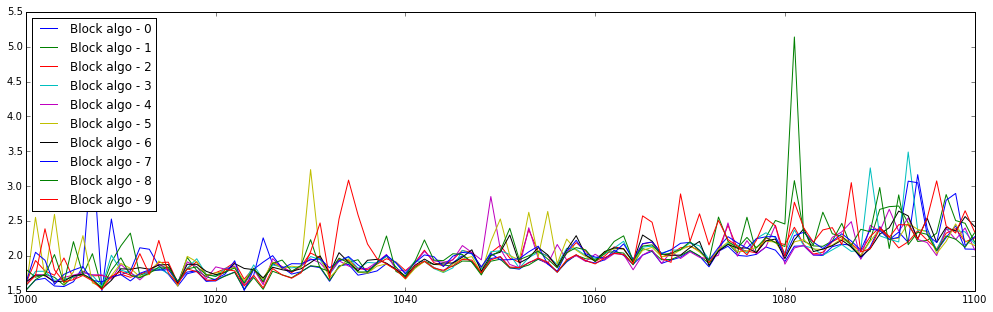

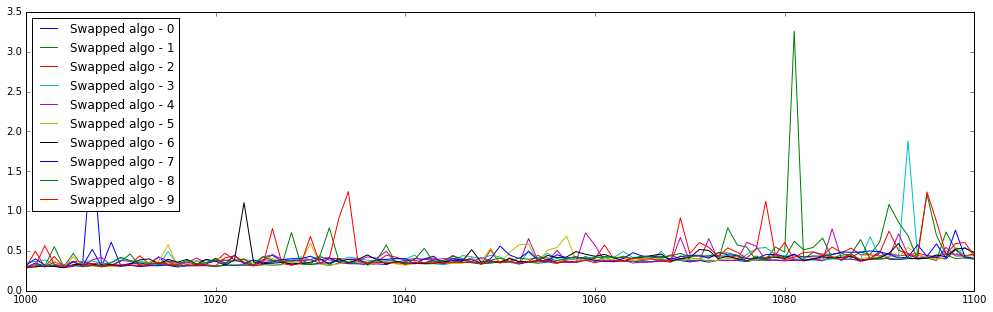

In [35]:
def draw_experiments(experiments):
    algos = experiments[0].keys()
    for algo in algos:
        ax = pyplot.figure(figsize=(17,5), dpi=90).add_subplot(111)
        for experiment in experiments:
            ax.plot([_[0] for _ in experiment[algo]], [_[1] for _ in experiment[algo]])
        ax.legend(['{} algo - {}'.format(algo, i) for i in xrange(len(experiments))], loc='upper left')
        pyplot.show()

draw_experiments(experiments)

#### Анализ графиков

* На графике `Simple algo` отчетливо виден всплеск времени обработки при `n = 1024`. Данный всплеск объясняется большим количеством cache-miss-ов из-за попадания подавляющего большинства элементов каждого из столбцов матрицы в один и тот-же cache set. В других алгоритмах данная закономерность при `n = 1024` не прослеживается.
* График `Simple algo` так же имеет четкую периодичность мелких пиков. Объяснить это можно различным смещением адресов элементов матрицы, что, вероятно, отражается на количестве cache-miss-ов.
* График `Swapped algo` представляет собой практически прямую линию, что говорит о его хорошей масштабируемости относительно размеров матрицы (по крайней мере на приведенном отрезке 1000-1100).
* График `Block algo` является чем-то промежуточным между описанными двумя. Масштабируемость у него не такая хорошая как у `Swapped algo` (т.е. замедление от увеличения размера матрицы происходит), но все же лучше чем у `Simple algo`.